# Script 3 -  unsupervised clustering

# Librairies

In [48]:
install.packages("NbClust")

Installing package into ‘/home/.local/R/4.4/lib’
(as ‘lib’ is unspecified)



In [49]:
# Load required packages
library(vegan)
library(NbClust)

# Loading data

In [4]:
# load data ---------------------------------------------------------------
load("Doubs.RData")  

# 0 Selection of a resemblance criteria -> (Dis) similarity or distance matrix

## 0.1 Data processing : remove empty sites 

In [5]:
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]
latlong <- latlong[-8, ]

## 0.2 Compute chord distance between species 

In [6]:
# Compute matrix of chord distances among sites
spe.norm <- decostand(spe, "normalize") # normalize datas
spe.ch <- vegdist(spe.norm, "euc") # calculate the euclidian distances of the normalized datas 

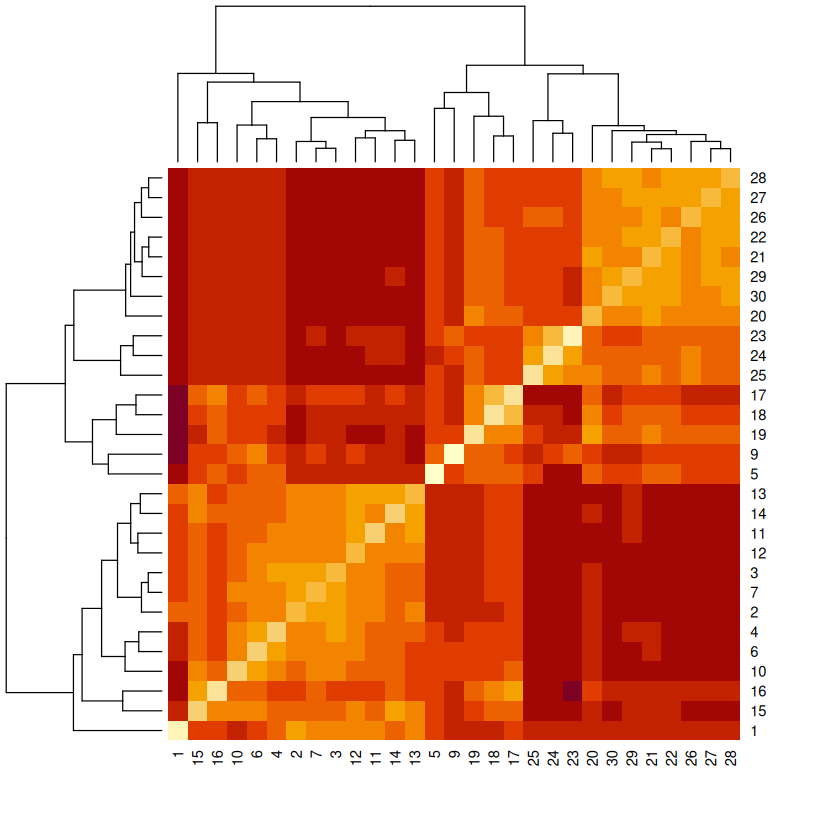

In [7]:
heatmap(as.matrix(spe.ch))

# 1  Hierarchical agglomerative clustering (maintain hierarchy of similarity within group)

<div style="display: flex; justify-content: space-around;">
    <img src="images/hierarchical clustering.png" width="15%">
    <img src="images/dendogram.png" width="15%">

</div>

## 1.0 Compute and plot hierarchical clustering

### 1.0.1 Hierarchical clustering computation -> *hclust(df_dist,method=)*

*Performs hierarchical cluster analysis on a distance matrix.* 

- **`df_dist`** → *Distance matrix*  
- **`method`** → *Agglomeration method*:  
  - `"complete"`: Complete linkage (default)  
  - `"single"`: Single linkage  
  - `"average"`: UPGMA (Unweighted Pair Group Method with Arithmetic mean)  
  - `"ward.D2"`: Ward's minimum variance method

### 1.0.2 Dendrogram Visualization → *plot(hc, hang, cex, main, xlab, ylab,sub,horiz)*

*Plots hierarchical clustering dendrograms with customizable formatting.*

- **hc** : *hclust object*
- **hang** : *Leaf heights*
- **cex** : *label size*
- **main** : *Title*
- **xlab** : X-axis label
- **ylab** : y-axis label
- **sub** : `Null`/`"Subtitle"` Subtitle
- **horiz** : `False`/`True` *horizontal plot*

## 1.1 Single linkage agglomerative clustering -> *hclust(df_dist,method ="single")*

<div style="display: flex; justify-content: space-around;">
    <img src="images/Single Linkage_1.png" width="25%">
    <img src="images/Single Linkage.png" width="25%">

</div>

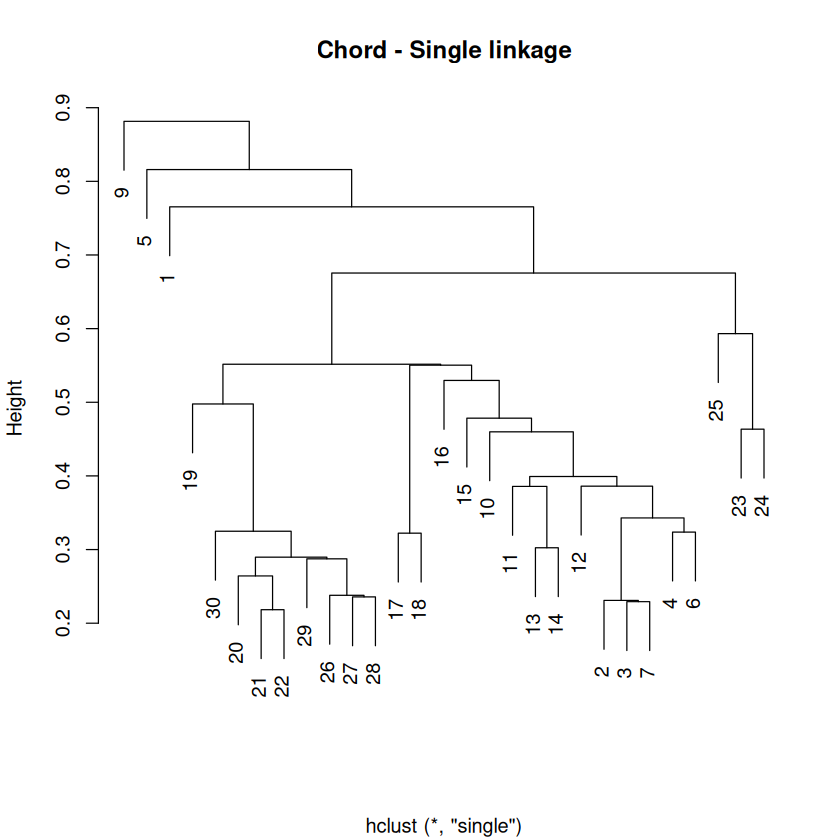

In [20]:
# Compute single linkage agglomerative clustering
spe.ch.single <- hclust(spe.ch, method = "single")
# Plot the dendrogram using default options
plot(spe.ch.single, main = "Chord - Single linkage", xlab="")


## 1.2 Complete-linkage agglomerative clustering -> *hclust(df_dist,method ="complete")*

<div style="display: flex; justify-content: space-around;">
    <img src="images/Complete Linkage.png" width="25%">
</div>

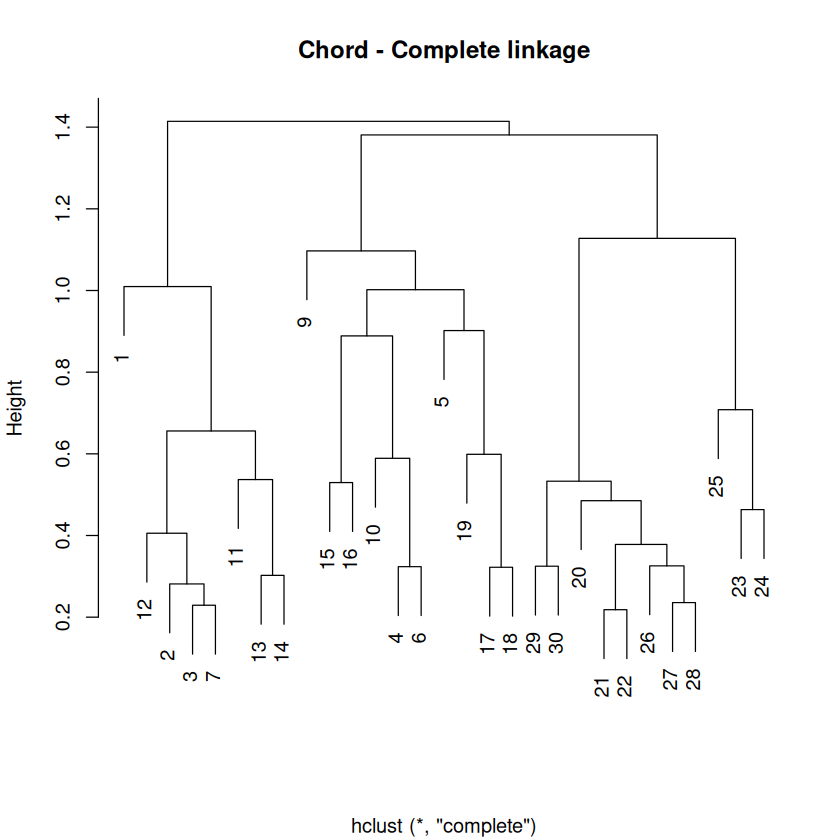

In [18]:
# Compute and plot complete-linkage agglomerative clustering
spe.ch.complete <- hclust(spe.ch, method = "complete")
plot(spe.ch.complete, main = "Chord - Complete linkage", xlab="")

## 1.3 UPGMA clustering -> *hclust(df_dist,method ="average")*

<div style="display: flex; justify-content: space-around;">
    <img src="images/UPGMA.png" width="35%">
</div>

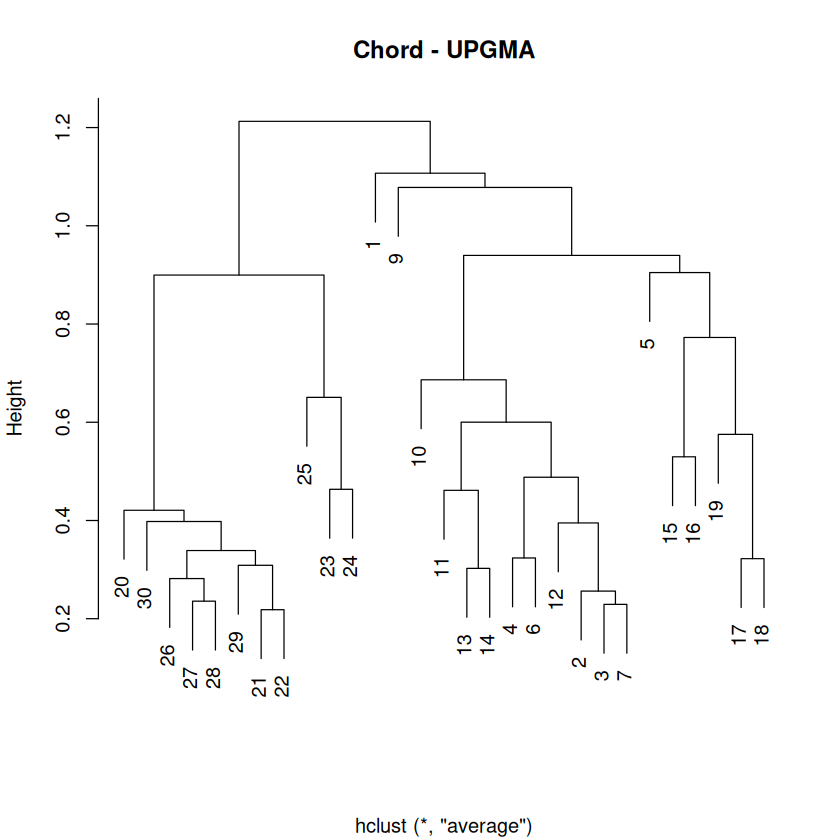

In [21]:
# Compute and plot UPGMA agglomerative clustering
spe.ch.UPGMA <- hclust(spe.ch, method = "average")
plot(spe.ch.UPGMA, main = "Chord - UPGMA", xlab="")

## 1.4 UPGMC clustering -> *hclust(df_dist,method ="centroid")*

<div style="display: flex; justify-content: space-around;">
    <img src="images/UPGMC.png" width="35%">
</div>

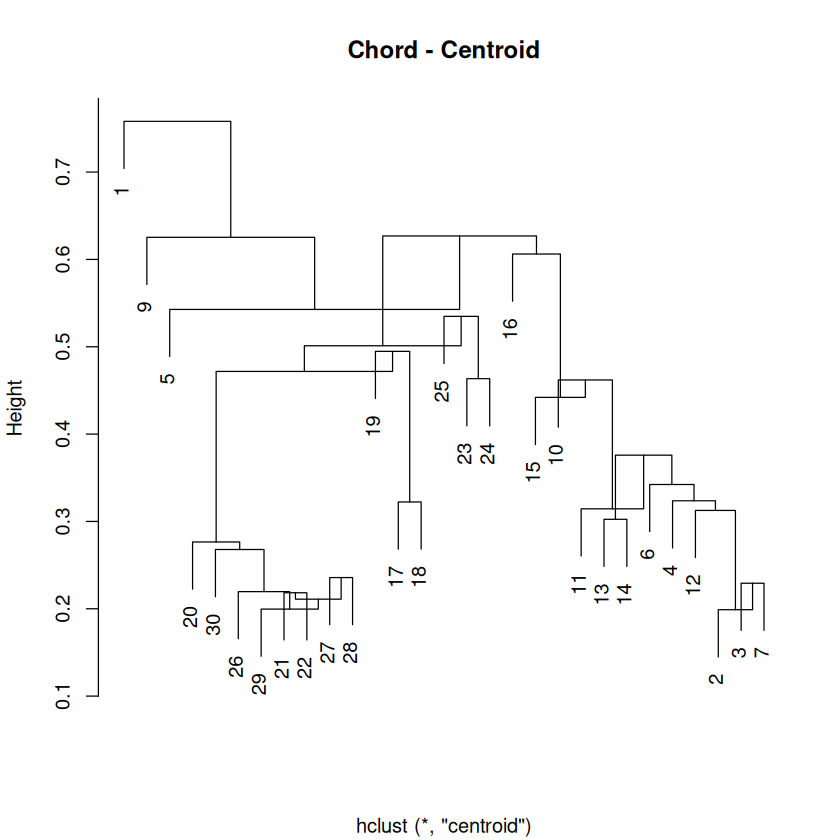

In [22]:
# Compute and plot UPGMC agglomerative clustering
spe.ch.centroid <- hclust(spe.ch, method = "centroid")
plot(spe.ch.centroid, main = "Chord - Centroid", xlab="")

## 1.5 Ward's minimum variance clustering -> *hclust(df_dist,method ="ward.D2")*

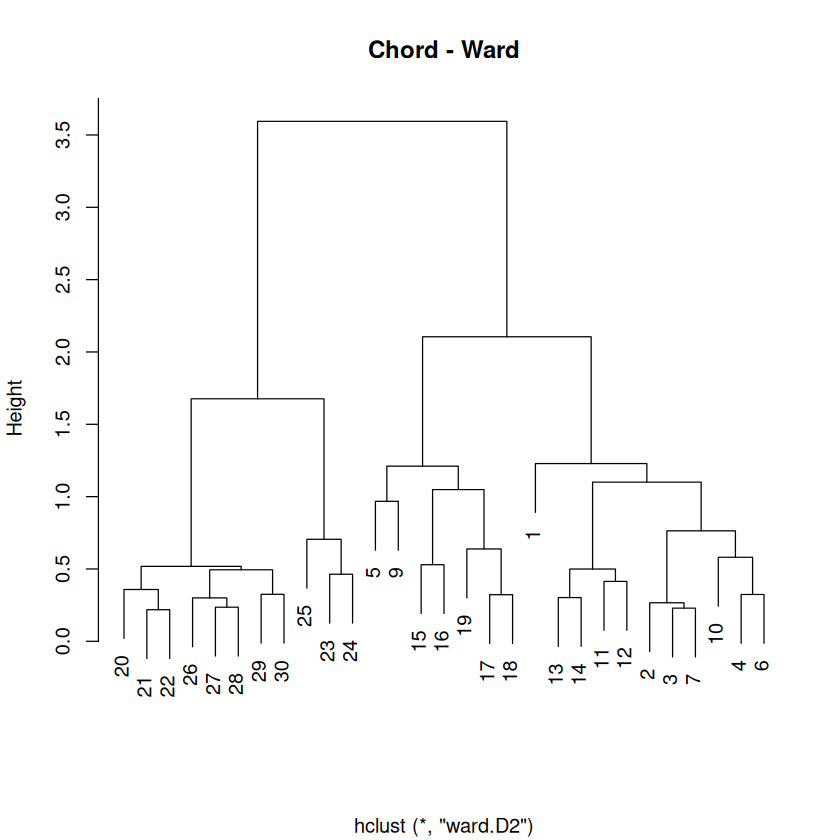

In [23]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.ward <- hclust(spe.ch, method = "ward.D2")
plot(spe.ch.ward,  main = "Chord - Ward", xlab="")

# 2 Non-hierarchical (Partition) clustering 

<div style="display: flex; justify-content: space-around;">
    <img src="images/non_hierarchical_clustering.png" width="25%">
    <img src="images/kmeans.png" width="30%">
</div>


*Source : Divakar, K-Means Clustering, Medium, 2023. https://medium.com/@divakar1591/k-means-clustering-fe4684e89df9*

## 2.0 Compute and plot K-means clustering -> *kmeans()*

### 2.0.1 k-means clustering computation -> *kmeans(df_dist,centers =,iter.max=)*

*Performs k-means partitioning clustering on a distance matrix.*
- **df_dist** : distance matrix
- **centers** : Number of clusters (k) to create
- **iter.max** : Maximum iterations


### 2.0.2 k-means Visualization -> *plot(df_dist, col = kmean_obj$cluster,pch,main,xlab,ylab)*

Visualizes k-means clustering results in 2D/3D space with cluster boundaries.

- **df_dist** : *ditance matrix*
- **kmean_obj** : *k-mean object created with the distance matrix*
- **pch** : *Point style*
- **Main** : *Title*
- **xlab** : *x-axis label*
- **ylab** : *y-axis label*

## 2.1 K-means clustering

In [25]:
#k-means clustering (non-hierarchical)
spe.ch.k<-  kmeans(spe.ch, centers=3)
spe.ch.k

K-means clustering with 3 clusters of sizes 11, 12, 6

Cluster means:
          1         2         3         4        5         6         7
1 1.4107253 1.3887658 1.3692498 1.2739314 1.004302 1.2017123 1.3517916
2 0.9068203 0.4954597 0.4844693 0.5417547 1.067183 0.5784449 0.4812705
3 1.3230235 1.0999961 1.0504975 0.9477804 0.748270 0.8415178 1.0091778
          9        10       11        12       13       14        15        16
1 1.1038601 1.2690111 1.363769 1.3658836 1.393568 1.328136 1.2342588 1.1561019
2 1.1348576 0.6779791 0.558652 0.4808317 0.571016 0.575236 0.6644242 0.8934415
3 0.8408263 0.8956542 1.089656 1.0531068 1.110418 1.016812 0.8590573 0.6766939
         17        18        19        20        21        22       23
1 0.9905818 0.8523994 0.7696860 0.5010256 0.4445614 0.4560813 0.842928
2 0.9389334 1.0244417 1.0894911 1.2652583 1.3005764 1.3222405 1.374404
3 0.5702668 0.5717185 0.6238873 0.7968633 0.8722581 0.9057062 1.150469
         24       25        26        27      

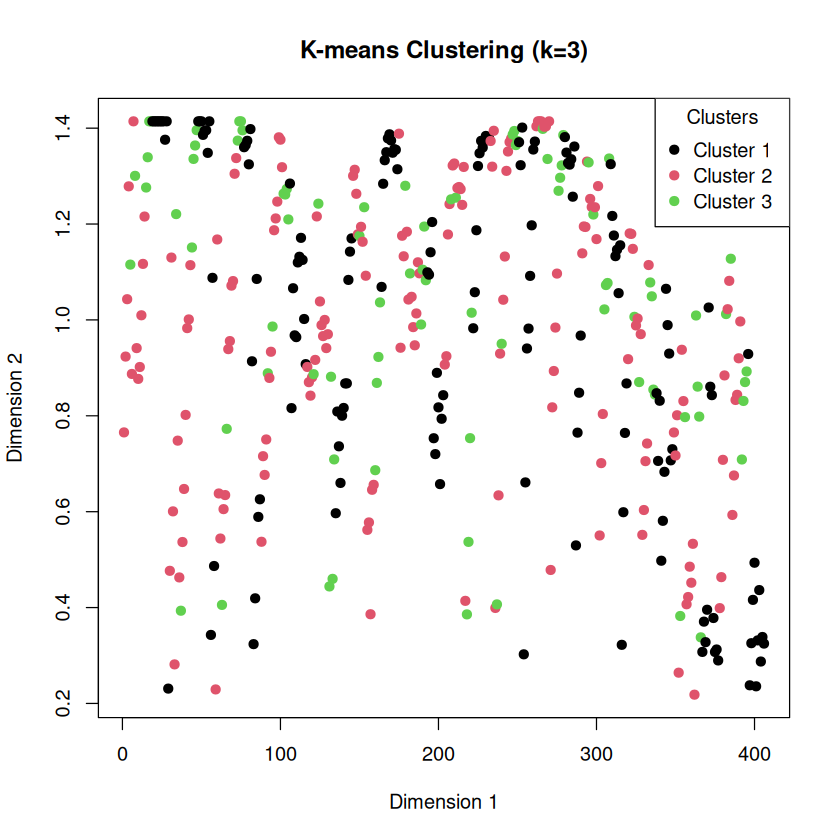

In [31]:
# 1. K-means visualisation
plot(spe.ch,                     # distance matrix
     col = spe.ch.k$cluster,     # Clusters colors
     pch = 19,                   # Point style
     main = "K-means Clustering (k=3)",
     xlab = "Dimension 1", 
     ylab = "Dimension 2")

# 2. legend
legend("topright",               # Position
       legend = paste("Cluster", 1:3),
       col = 1:3,                # Clusters colors
       pch = 19,                 # Point style (same as in the plot)
       title = "Clusters")

# 3 Cophenetic correlation 

> The **cophenetic correlation** coefficient (or simply cophenetic correlation) is a measure used in  **assess** how well a **dendrogram** **preserves** the **original pairwise distances** between **data points**. It essentially **quantifies** the **similarity** between the **original distances** used to create the dendrogram and the "cophenetic **distances" derived from the dendrogram.**

<div style="display: flex; justify-content: space-around;">
    <img src="images/Cophenetic matrix.png" width="30%">
</div>

## 3.0 Cophenetic Distance and correlation Computation → *cophenetic(hc), cor(df_dist,cophenetic_dist)*

Used to evaluate how well the hierarchical clustering preserves the original pairwise distances.

- **hc** : *hierarchical clustering object from a distance matrix*
- **df_dist** : *distance matrix*
- **cophenetic_dist** : *cophenetic distance*

### 3.0.1 Compute the cophenetic distance matrix -> *cophenetic(hc)*

- **cophenetic_dist <- cophenetic(hc)** : *Compute the cophenetic distance matrix (ultrametric distances from the dendrogram)*

### 3.0.2 Compute the correlation between the cophenetic distance matrix and the distance matrix -> *cor(df_dist,cophenetic_dist)*

- **cor(copehenetic_dist,df_dist)** : *Compute the correlation between the original and cophenetic distances*

## 3.1 Single linkage clustering

In [35]:
# Single linkage clustering
spe.ch.single.coph <- cophenetic(spe.ch.single)
cor(spe.ch, spe.ch.single.coph)

[1] 0.599193

## 3.2 Complete linkage clustering

In [36]:
# Complete linkage clustering
spe.ch.comp.coph <- cophenetic(spe.ch.complete)
cor(spe.ch, spe.ch.comp.coph)

[1] 0.7655628

## 3.3 UPGMA clustering

In [37]:
# Average clustering
spe.ch.UPGMA.coph <- cophenetic(spe.ch.UPGMA)
cor(spe.ch, spe.ch.UPGMA.coph)

[1] 0.8608326

## 3.4 Ward's minimum variance clustering

In [39]:
# Ward clustering
spe.ch.ward.coph <- cophenetic(spe.ch.ward)
cor(spe.ch, spe.ch.ward.coph)

[1] 0.7998516

# HOMEWORK : TASK 1: Use the oribatide mite dataset, calculate a similarity measure and perform clustering analysis.
- #Q0: use the oribatide mite dataset, calculate similarity measure and perform clustering analysis. 
- #Q1: based on visual inspection of the dendrogram - which clustering algorithm produces the "best" results?
- #Q2: how many groups of sites - based on mite community similarity are there? 
- #Q3: explore the impact of log-transformation of mite abundances on the cluster analysis?
- #Q4 What does this tell us in terms of the importance of abundant mite species for the overall structure of the mite community?

In [ ]:
## Q0 use the oribatide mite dataset, calculate similarity measure and perform clustering analysis. : (hint : )
# your code here : 

In [ ]:
## Q1 based on visual inspection of the dendrogram - which clustering algorithm produces the "best" results? (hint : )
# your code here :


In [ ]:
##Q2: how many groups of sites - based on mite community similarity are there? (hint : )
# your code here :


In [ ]:
##Q3: explore the impact of log-transformation of mite abundances on the cluster analysis? (hint : )
# your code here :


In [40]:
##Q4 What does this tell us in terms of the importance of abundant mite species for the overall structure of the mite community?
# your code here

# 4 Shepard Diagrams

> *A Shepard diagram **compares** **original** **dissimilarities** against **cophenetic distances from hierarchical clustering**. The **tighter the points align around the 1:1 reference line**, the **better the clustering preserves** the **original distance** structure. Deviations reveal distortions introduced by the clustering algorithm.*

<div style="display: flex; justify-content: space-around;">
    <img src="images/shepard_distance.png" width="30%">
</div>

## 4.0 Shepard Diagram visualization → *plot(df_dist,cophenetic_dist), lines(lowess(df_dist, cophenetic_dist), col = "red", lwd = 3)*

The Shepard diagram visualizes the relationship between the original distance matrix and the cophenetic distances from a hierarchical clustering.

- **df_dist** : *distance matrix*
- **cophenetic_dist** : *copehenetic distance matrix*
- **abline(0,1)** : *Add a 1:1 reference line (ideal match between distances)*
- **lines(lowess(df_dist, cophenetic_dist), col = "red", lwd = 3)** : *Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend*


## 4.1 Single linkage clustering

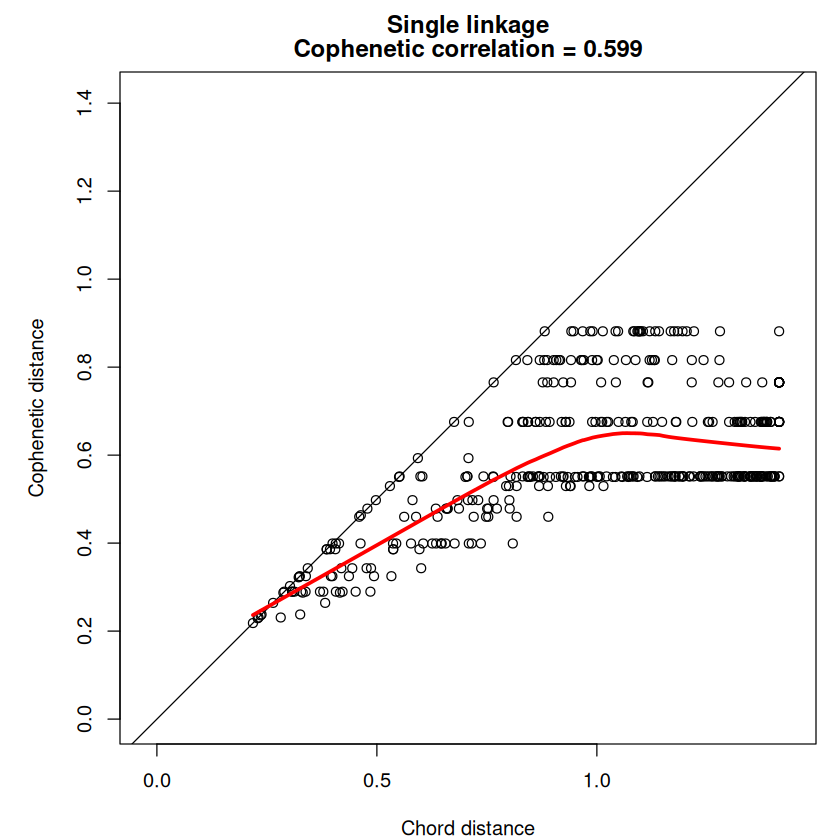

In [43]:
# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.single.coph, #initial chord distance against cophenetic distance from single linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Single linkage", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.single.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.single.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

# 5 Optimal number of clusters -> *NbClust()*

### 5.0.2 Optimal number of clusters → *NbClust(df, diss= df_dist,distance = NULL, min.nc =, max.nc =, method=,index =)*

*Determines the optimal number of clusters using various statistical indices.*

- **df** : *Raw data matrix* (rows = observations, columns = variables)   
- **df_dist** : *Distance matrix*,(only used if `diss = NULL`)  
- **method** : *Clustering method*:  
  - "complete": Complete linkage  
  - "single": Single linkage  
  - "average": UPGMA  
  - "ward.D2": Ward's minimum variance method  
- **min.nc, max.nc** : *Range of cluster numbers to test (min to max)*  
- **index** : *Evaluation index*, e.g., `"ch"` (Calinski-Harabasz), `"silhouette"`, `"gap"`, etc.


**Output**  :

- **`Nb.result$All.index`**  
  - A numeric vector containing the values of the evaluation index for **all** tested cluster numbers (from `min.nc` to `max.nc`)  
  - Useful to plot the index curve and visualize which number of clusters is best
  - 
- **`Nb.result$Best.nc`**  
  - A list containing:  
    - `Number_clusters` → The optimal number of clusters determined by the chosen index  
    - `Value_Index` → The value of the evaluation index at the optimal number of clusters
    - 
- **`Nb.result$Best.partition`**  
  - A vector assigning each observation in the data to one of the clusters in the optimal partition  
  - Each element corresponds to the cluster label for that observation  


### 5.0.2 Plot the optimal number of clusters -> *plot(x,Nb.single$All.index)*

*Determines the optimal number of clusters using various statistical indices.*

- **x** : *Range of cluster numbers to test (min to max)*  
- **Nb.single$All.index** : *Evaluation index values (y)*  

## 5.1 Find optimal number of clusters for the Single Linkage Clustering 

In [50]:
Nb.single <- NbClust(
  spe,                # Input Spe matrix 
  diss = spe.ch,      #  Chord distance matrix for spe
  distance = NULL,    # Distance metric is NULL because we provide 'diss' directly
  min.nc = 2,         # Minimum number of clusters to test (start at 2)
  max.nc = 16,        # Maximum number of clusters to test (up to 16)
  method = "single",  # Clustering linkage method: single linkage here
  index = "ch"        # Evaluation criterion: Calinski-Harabasz index
)

In [52]:
Nb.single  # Displays the output from NbClust, including the suggested optimal number of clusters and clustering indices for all tested cluster counts

$All.index
      2       3       4       5       6       7       8       9      10      11 
 0.6796  0.7581  0.7531  1.0773  0.8409  8.5882  9.1594  9.2087 10.1703  9.8839 
     12      13      14      15      16 
 8.8171  8.2062  8.2693  7.4850  7.0619 

$Best.nc
Number_clusters     Value_Index 
        10.0000         10.1703 

$Best.partition
 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
 1  2  2  2  3  2  2  4  2  2  2  2  2  2  5  6  6  7  8  8  8  9  9 10  8  8 
28 29 30 
 8  8  8

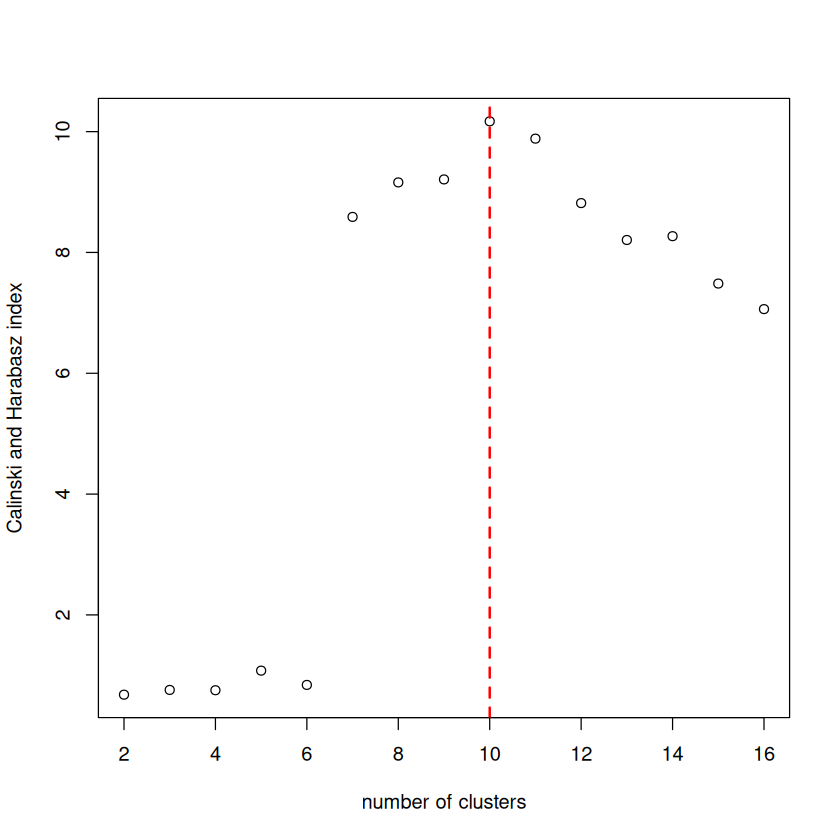

In [54]:
plot(2:16, Nb.single$All.index,               # Plot index values (y) vs. number of clusters (x from 2 to 16)
     xlab = "number of clusters",             # Label for x-axis
     ylab = "Calinski and Harabasz index")    # Label for y-axis

abline(v = 10,                               # Add a vertical dashed line at x = 10 (optimal clusters)
       col = "red",                          # Color of the line
       lty = 2,                             # Line type 2 = dashed
       lwd = 2)                             # Line width thicker for visibility


# 6 Advanced dendogram plotting (Convert hclust object to dendrogram and plot) -> *hc.dend <- as.dendrogram(hc)*, *plot(hc.dend)*

## 6.0 Advanced dendogram plotting -> *as.dendogram(hc)*, *plot (hc.dend)*

- **hc** : *hierarchical clustering object from a distance matrix*
- **hc.dend** :  *Dendogram objected from the hierarchical clustering object*

```r
# Convert hc object to dendrogram object
hc.dend <- as.dendrogram(hc)  

# Plot the dendrogram
plot(hc.dend)

In [55]:
library(dendextend)

Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan


---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:permute’:

    shuffle


The following object is masked from ‘package:stats’:

    cutree




## 6.1 UPGMA clustering dendogram plotting

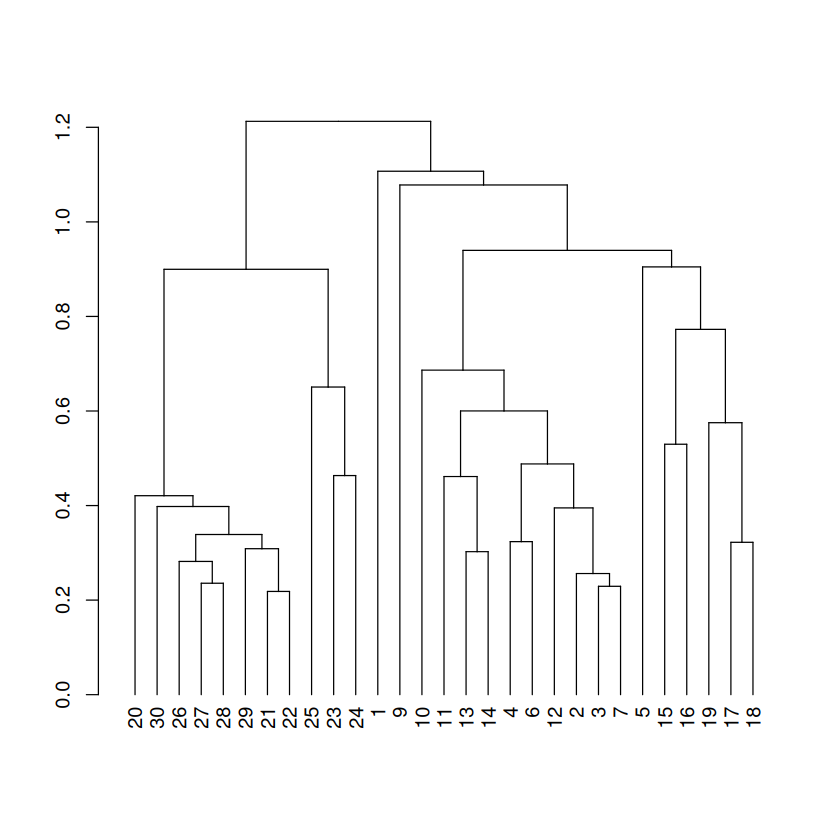

In [57]:
UPGMA.dend <- as.dendrogram(spe.ch.UPGMA)   #convert from hclust object to dendrogram
plot(UPGMA.dend)                            #plot dendrogram

## 6.2 Combination as.dendogram() & Nbclust()

### 1) Compute the dendogram from the hclustering object
**as.dendogram(hc)**  

```r
# Convert hc object to dendrogram object
hc.dend <- as.dendrogram(hc)  

```

### 2) Compute the ideal number of clusters

**Nbclust()**
```r
Nb.hc <- NbClust(
  df,                 # Data matrix
  diss = df_dist,   # Optional: precomputed distance matrix
  distance = NULL,      # NULL if using 'diss'
  min.nc = 2,           # Minimum number of clusters
  max.nc = 16,          # Maximum number of clusters
  method = "ward.D2",   # Linkage method
  index = "ch"          # Clustering quality index
)
```
### 3) Attribute the right colors to the clusters

```r
colors_to_use <- Nb.hc$Best.partition      #define colors and sort according to tips in dendrogram
colors_to_use<-colors_to_use[order.dendrogram(hc.dend)]

labels_colors(hc.dend) <- colors_to_use   #change color of tip labels depending on best partition
```
### 4) change color of branches using n (k-means) clusters
```r

#change color of branches using n (k-means) clusters
labels_colors(hc.dend)<-1
hc.dend <- hc.dend %>% color_branches(k = n)
plot(hc.dend)
```

## 6.3 Advanced plotting with UPMGA 

$All.index
      2       3       4       5       6       7       8       9      10      11 
20.5008 10.7431  7.6410  8.0089  7.0172 13.6701 13.8323 12.3052 10.5660 10.2638 
     12      13      14      15      16 
 9.7822  9.1350  8.5217  7.7464  7.3259 

$Best.nc
Number_clusters     Value_Index 
         2.0000         20.5008 

$Best.partition
 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2 
28 29 30 
 2  2  2

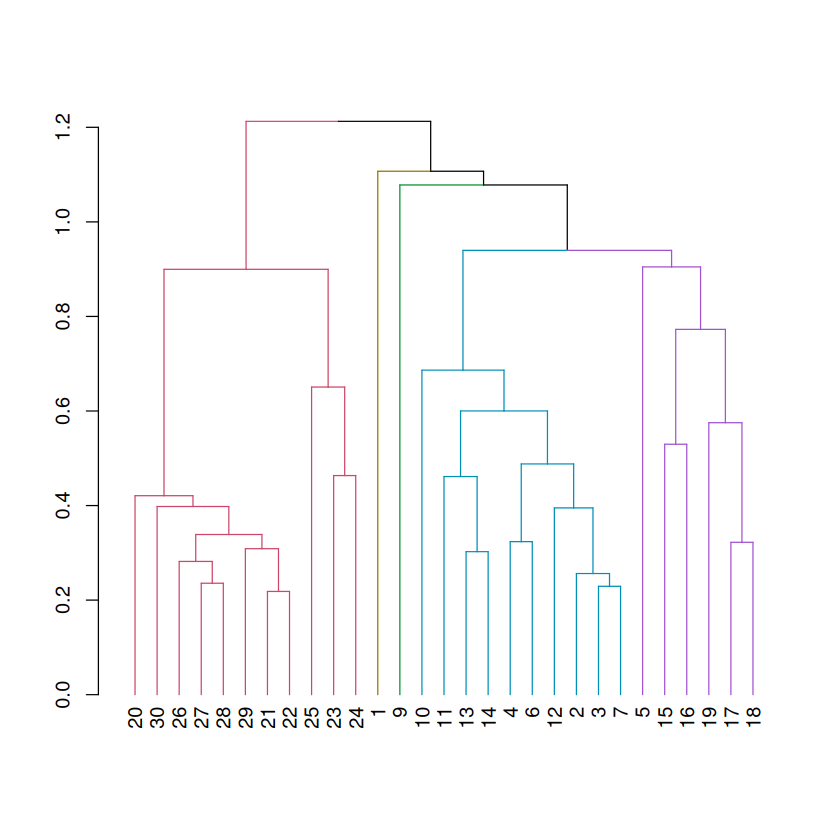

In [60]:
UPGMA.dend <- as.dendrogram(spe.ch.UPGMA)   #convert from hclust object to dendrogram                          



Nb.UPGMA<-NbClust(spe, diss=spe.ch, distance = NULL, min.nc=2, max.nc=16, 
                   method = "average", index="ch")
Nb.UPGMA      #there are 2 optimal groups.

colors_to_use <- Nb.UPGMA$Best.partition      #define colors and sort according to tips in dendrogram
colors_to_use<-colors_to_use[order.dendrogram(UPGMA.dend)]

labels_colors(UPGMA.dend) <- colors_to_use   #change color of tip labels depending on best partition


#change color of branches using 5 (k-means) clusters
labels_colors(UPGMA.dend)<-1
UPGMA.dend <- UPGMA.dend %>% color_branches(k = 5)
plot(UPGMA.dend)

# HOMEWORK : TASK 2: Use NbClust to determine the optimal number of clusters in the mite dataset (see previous task) - how does this agree with your visual assessment?